In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

%matplotlib inline

Goals:
* Train Random Forest Classifier
* Observe what happens when we increase number of trees
* Plot decision boundary

(20, 2) (20,)


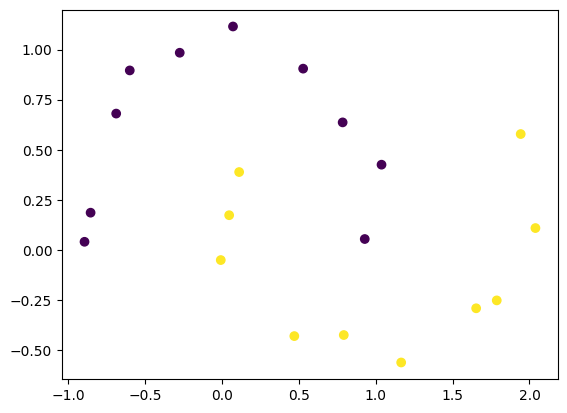

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(noise=.1, n_samples=20)
X_test, y_test = make_moons(noise=.1)
print(X.shape, y.shape)

plt.scatter(X[:,0], X[:,1], c=y)

Fit and evaluate Random Forest Classifier

In [3]:
from sklearn.ensemble import RandomForestClassifier

# define the model
rf = RandomForestClassifier()

# train
rf.fit(X, y)

# compute score on test data
rf.score(X_test, y_test)

0.96

## Increase number of base classifiers

During the lecture, we said that random forest does not overft, when we incerease number of trees. Let us check this statement on our toy dataset.

In [4]:
scores = []
tr = np.arange(1, 500, 10)

for n_trees in tr:
    fr = RandomForestClassifier()
    rf.fit(X, y)

    sc = rf.score(X_test, y_test)
    scores.append(sc)

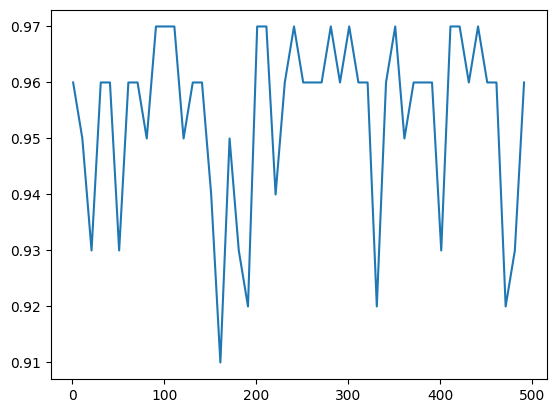

In [5]:
# plot score w.r.t. number of trees
plt.plot(tr, scores)


## Plot decision boundary

We've also mentioned that the decision boundary of the random forest is more smooth. Now we will check this statement as well and see how the boundary chages when we increase number of trees in the forest.

In [6]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

x1, x2 = get_grid(X)

In [7]:
def plot_boundary(rf):
    # make predictions
    y_pred = rf.predict_proba(np.c_[x1.ravel(), x2.ravel()])[:,0]
    y_pred = y_pred.reshape(x1.shape)

    # plot
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.show()

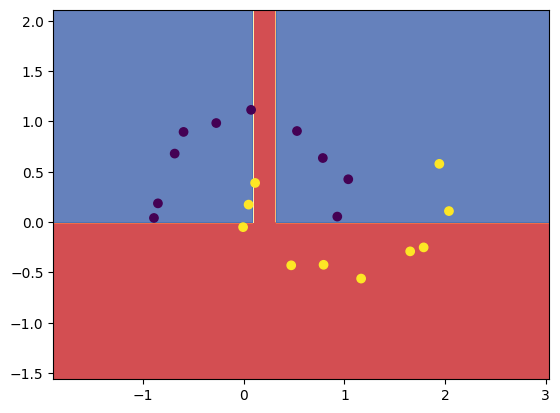

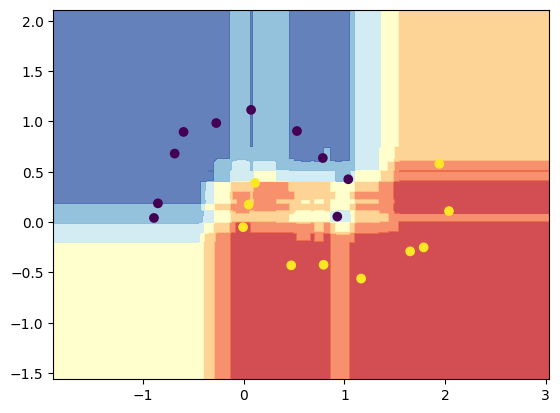

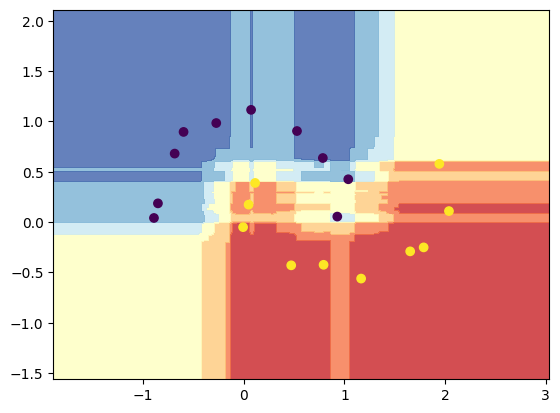

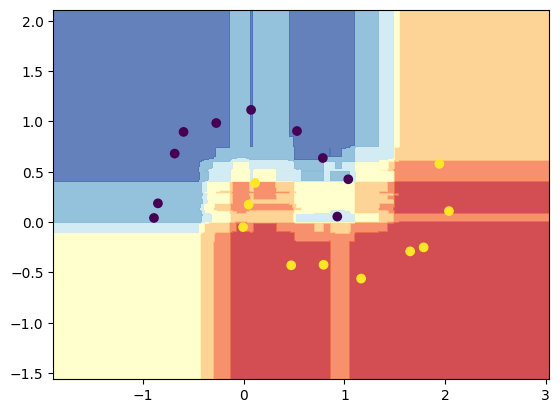

In [8]:
tr = np.arange(1, 200, 50)
for n_trees in tr:
    # fit random forest
    rf = RandomForestClassifier(n_estimators=n_trees)
    rf.fit(X, y)

    # plot boudary
    plot_boundary(rf)